
# Titanic EDA with Python

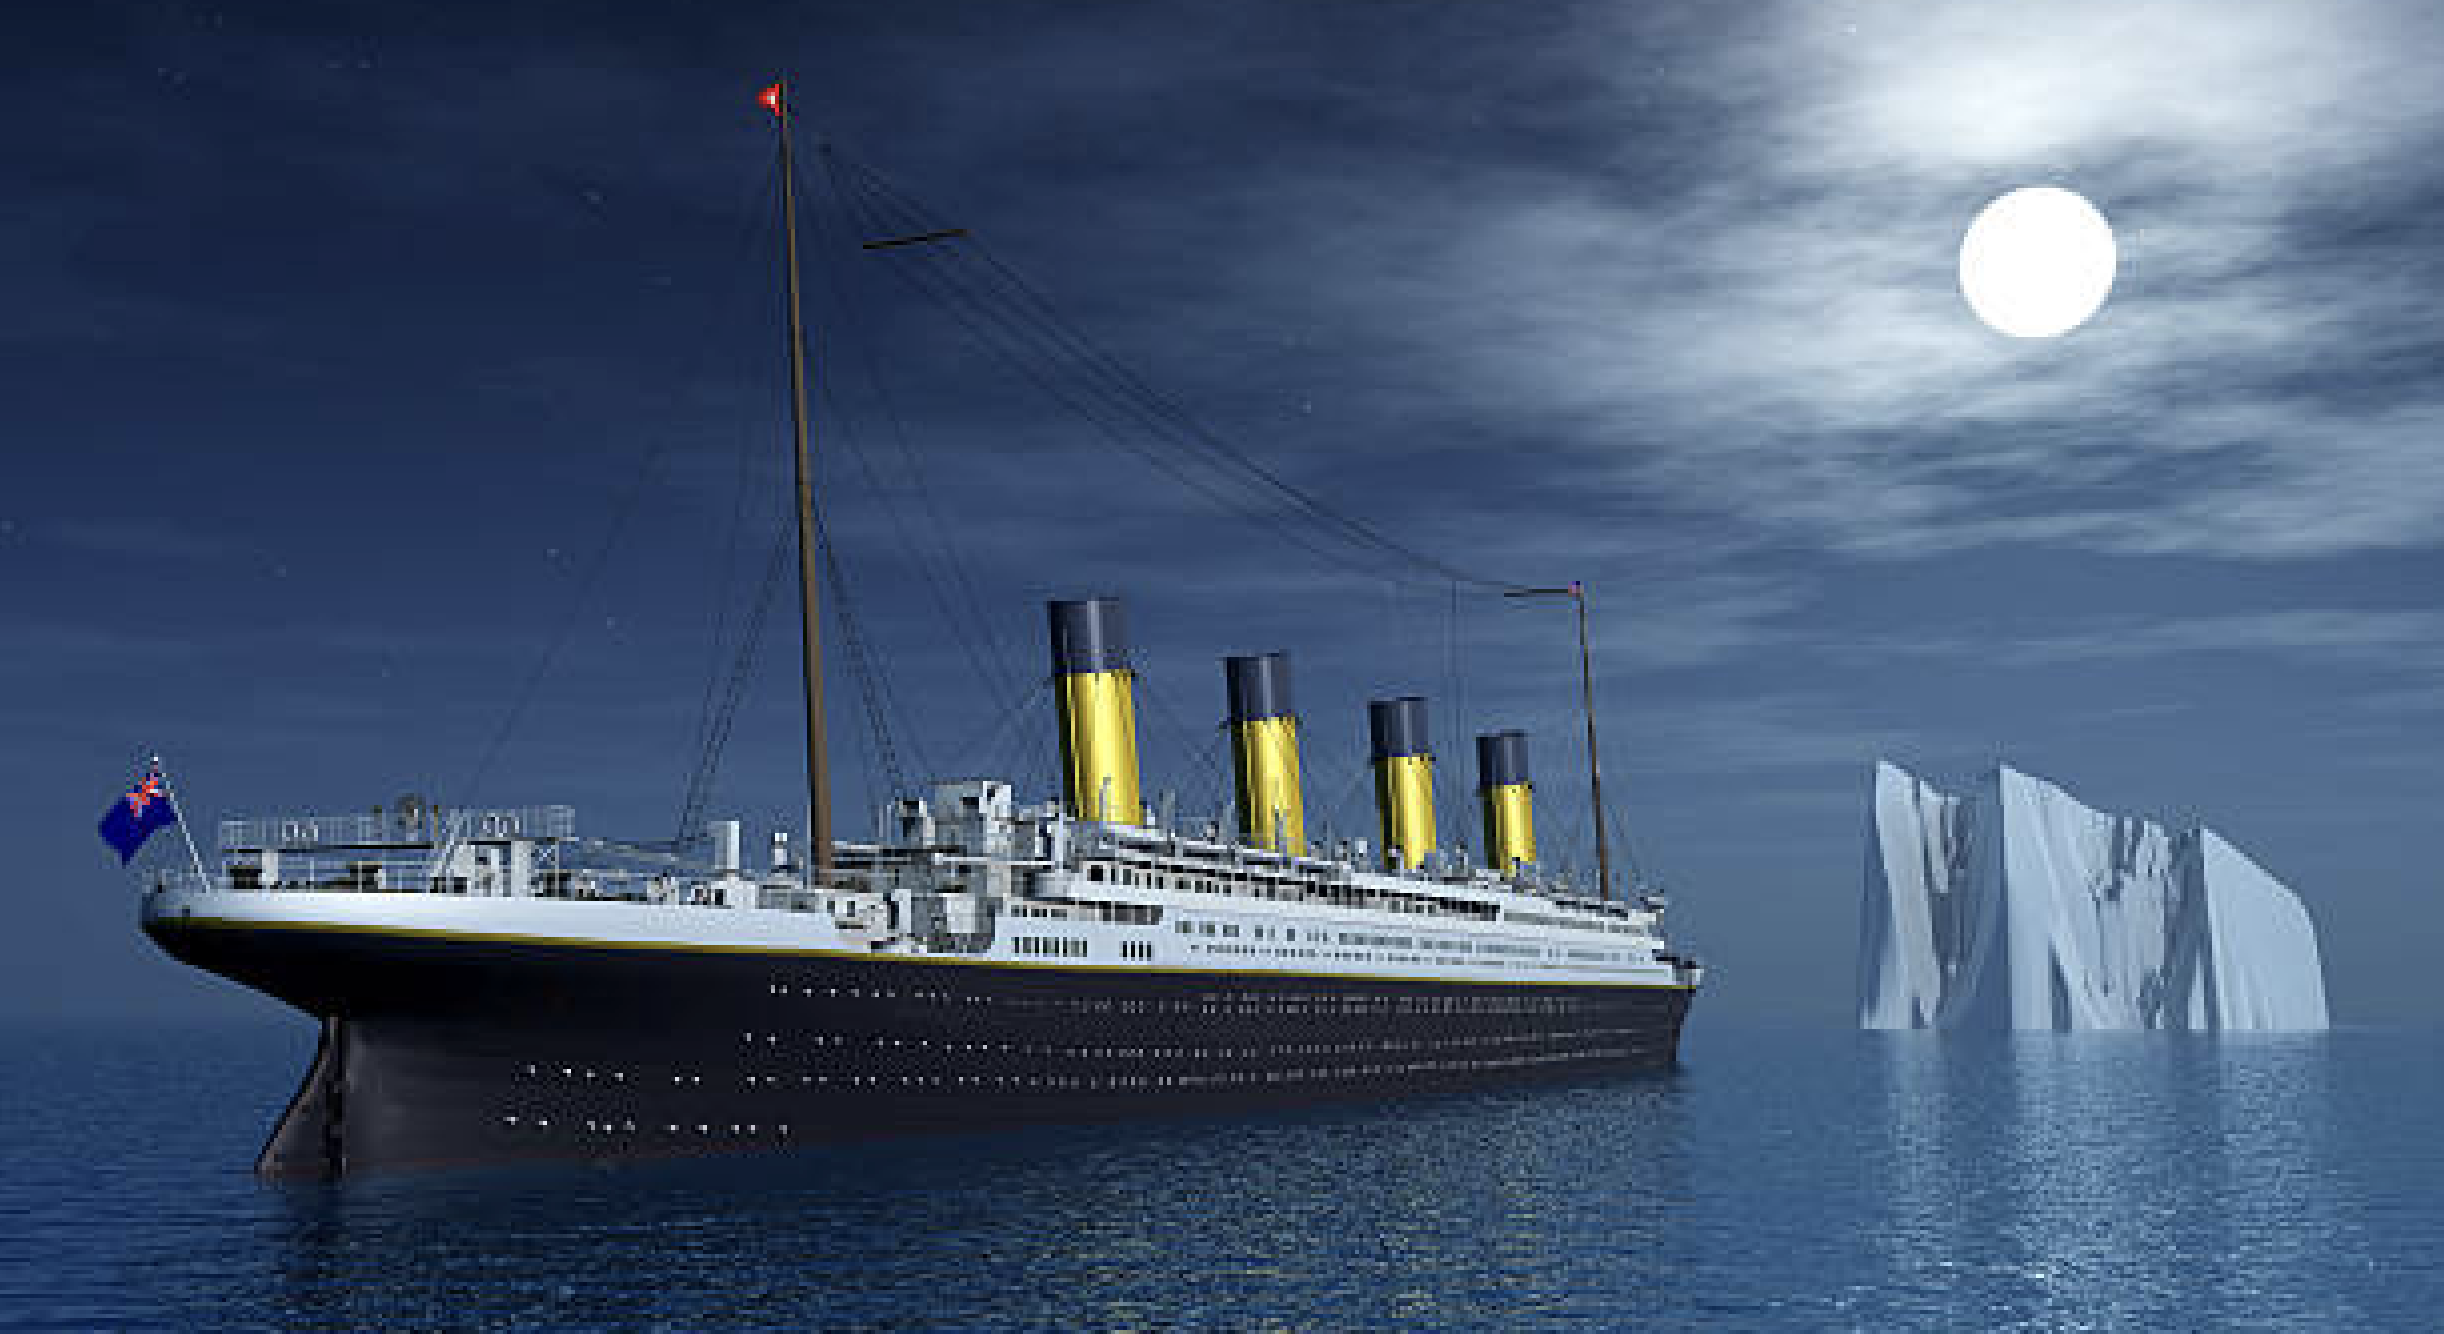

This project applies Exploratory Data Analysis (EDA) techniques to the Titanic passenger dataset in order to identify the key factors influencing passenger survival. The primary objective is to analyze the relationship between the target variable Survived and various demographic, socio-economic, and travel-related features, and to develop a structured understanding of the dataset.

The analysis begins with an initial overview of the data, including examination of data types, summary statistics, and missing value patterns. Appropriate data preprocessing steps are performed, including handling missing values in key features such as Age and Embarked, and removing the Cabin variable due to extensive missingness.

Both categorical variables (such as gender, passenger class, and embarkation port) and numerical variables (including age, fare, and family size) are explored using univariate and multivariate analysis techniques. Visualization and correlation analysis are employed to uncover meaningful patterns and relationships affecting survival outcomes.

The insights derived from this exploratory analysis aim to provide a strong foundation for feature engineering, informed decision-making, and future predictive modeling. This project demonstrates an end-to-end analytical workflow, from data cleaning and exploration to insight generation and interpretation.

## Importing libraries

In [1]:
import pandas as pd # pandas helps to read the dataset, and also contains functions that will do most of the pre-processing.
import numpy as np # numpy is used to work with arrays: multi-dimensional or single dimensional. 
import matplotlib.pyplot as plt # matplotlib is used for visualization
import seaborn as sns # seaborn is used for visualization, also contains various statistical concepts.
import matplotlib_inline

## Data

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.shape

(891, 12)

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

We will do EDA starting with Missing Data analysis.

### Missing Data

We will use seaborn to create a simple heatmap to see where we are missing data!

In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


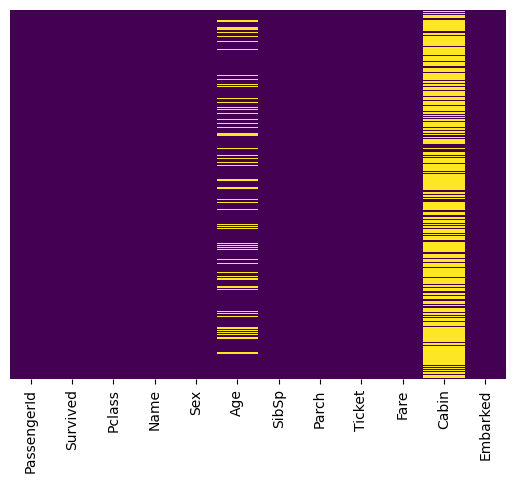

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
plt.show()

Age: Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
Cabin: It looks like we are just missing too much of that data to do something useful with at a basic level. We'll either drop this later, or change it to another feature like "Cabin Known: 1 or 0"
Embarked: Only 2 records are missing the embarked data. We can either drop these rows or fill them using mod value.

### Univariate Analysis

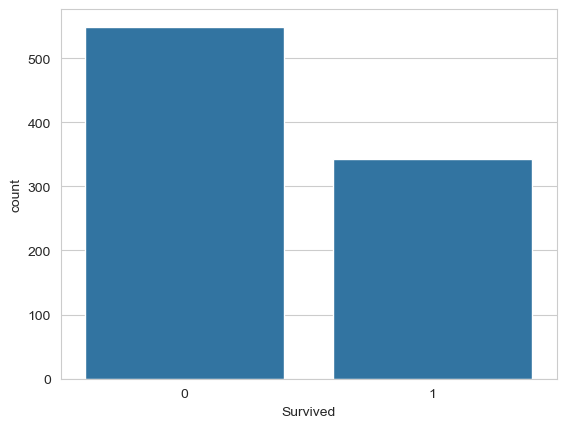

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

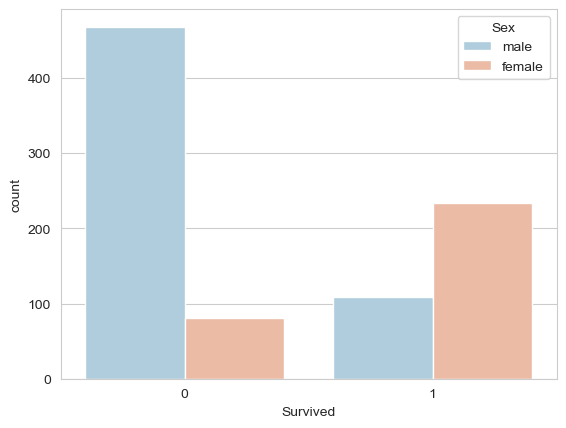

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.show()

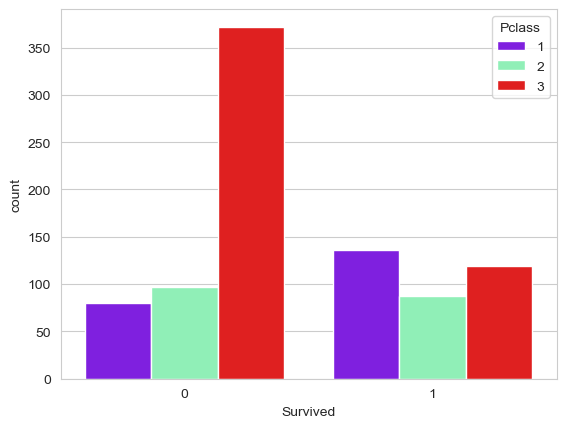

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

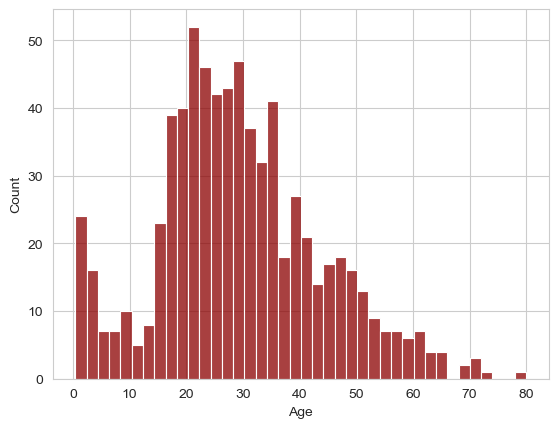

In [15]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.show()

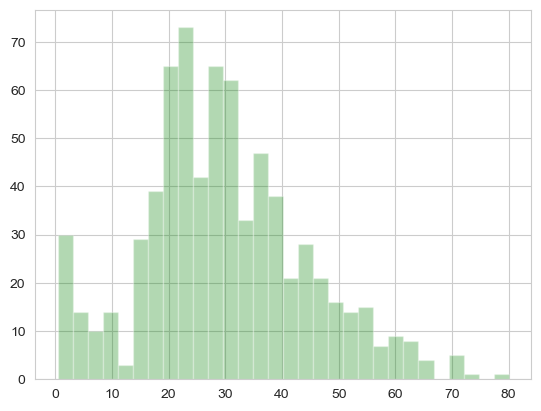

In [16]:
train['Age'].hist(bins=30,color='green',alpha=0.3)
# we can either use .hist function or can use .distplot function. Both of them can be used to see the distribution.
plt.show()

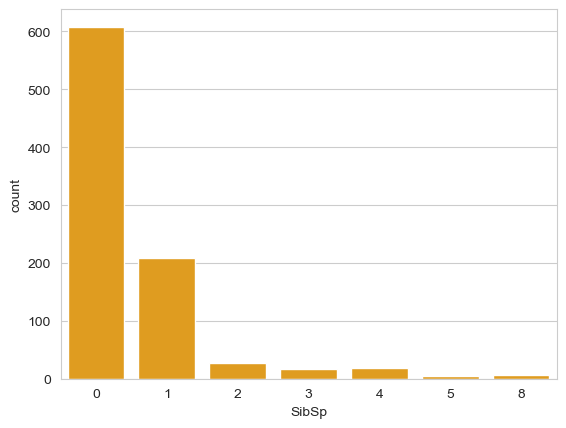

In [17]:
sns.countplot(x='SibSp',data=train,color='orange')
# seeing the countplot of people having siblings or spouse: SibSp
plt.show()

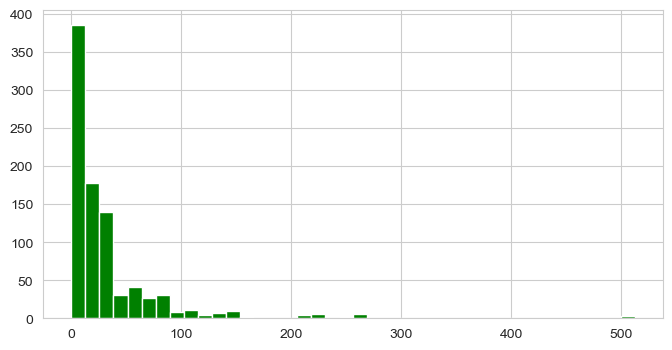

In [18]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
# the distribution of the fare of the ticket. Other way to do this would be :
# sns.distplot(train['Fare'],kde=False,bins=40,color='green')
plt.show()

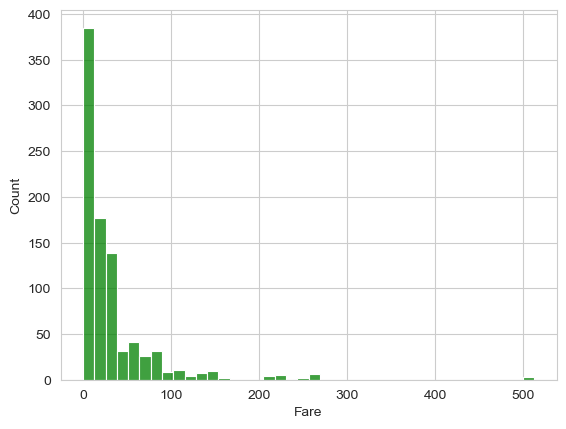

In [19]:
sns.histplot(train['Fare'],kde=False,bins=40,color='green')
plt.show()

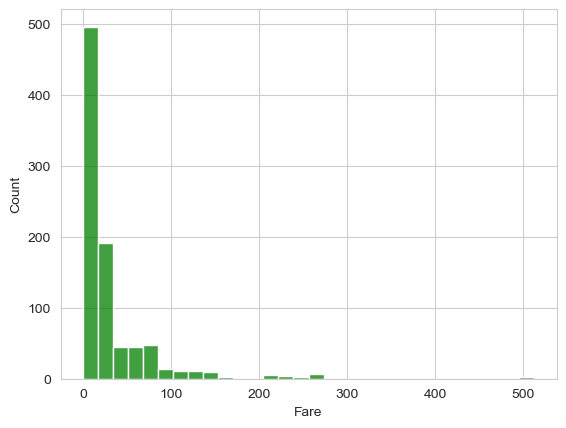

In [20]:
sns.histplot(train['Fare'], bins=30, color='green')
plt.show()

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
Another more smarter way can be to check the average age by passenger class, i.e. instead of finding the mean age for all passengers, we can find it dependng on the passenger-class, and hence the avg value we use to fill the null values would be a better fit for each passenger-class.


/var/folders/ky/thgj5d6s3hd4xstnvjy3vtj40000gn/T/ipykernel_70467/913914448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


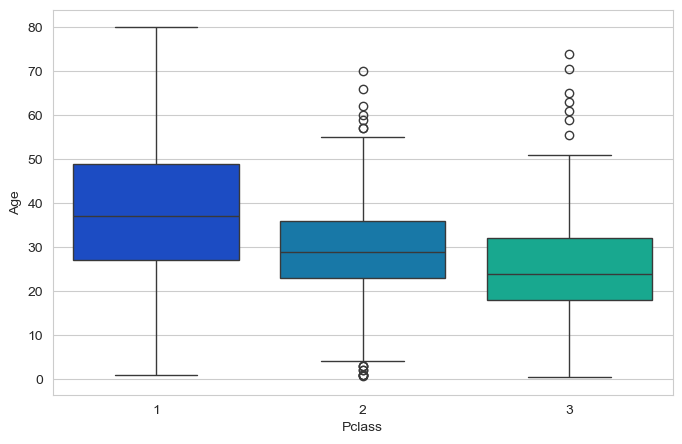

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
# can also be done by either of these two:
# sns.boxplot(x='Pclass',y='Age',orient='v',data=train,palette='winter')
# sns.boxplot(y='Pclass',x='Age',orient='h',data=train,palette='winter')
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now applying the age imputation function!

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# we assign the returned value from this impute function to the age column.

# axis = 0 or 'index': means apply function to each column, i.e. along X-axis
# axis = 1 or 'columns': means apply function to each row, i.e. along Y-axis

/var/folders/ky/thgj5d6s3hd4xstnvjy3vtj40000gn/T/ipykernel_70467/822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/ky/thgj5d6s3hd4xstnvjy3vtj40000gn/T/ipykernel_70467/822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Now checking that heat map again:

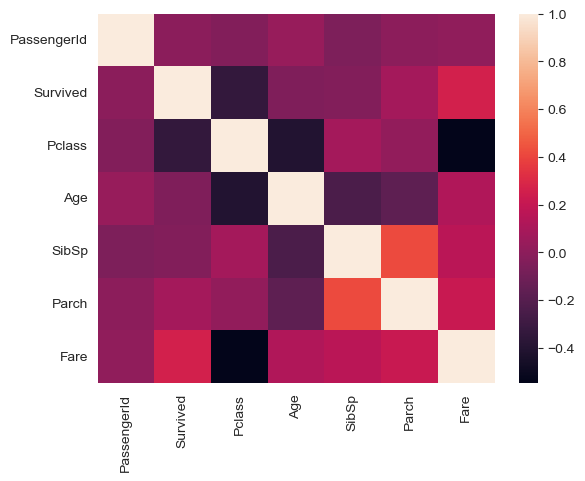

In [24]:
sns.heatmap(train.corr(numeric_only = True))
# here train.corr is giving the coorelation matrix of the dataframe we have.
plt.show()

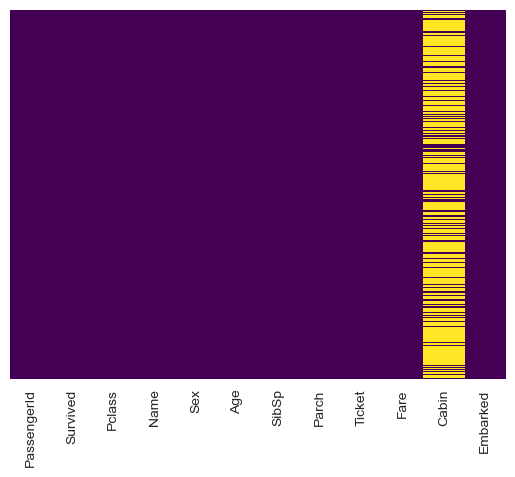

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# we can see that the Age column no longer has missing values, as we have replaced the null values with avg. 
# The Cabin column still has null values, so next step would be to take care of that.

We will go ahead and drop the Cabin column.

In [26]:
train.drop('Cabin',axis=1,inplace=True)
# dropping the cabin column and doing it for all rows. (since axis = 1, i.e. along Y-axis, i.e. for all rows)

# If we wanted to replaces these null values by something else, then we would have to use feature engineering.

For Embarked column, we will fill the missing values using mod value.

In [27]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Embarked'].isnull().sum()

np.int64(0)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


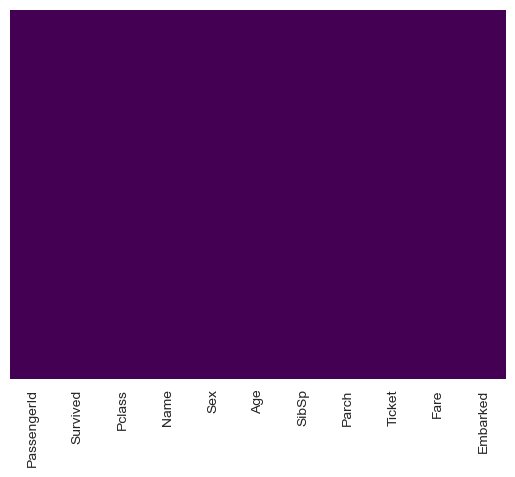

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# no null values present now.

In [30]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We can see that no more missing values are there in our data.

As a next step, we can also create some new features using feature engineering

## Feature Engineering

In [31]:
# Creating Family Size feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train[['SibSp','Parch','FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [32]:
# analysis
train.groupby('FamilySize')['Survived'].mean().sort_values(ascending=False)

FamilySize
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [33]:
# Extracting Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [34]:
# Extracting Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [35]:
# grouping rare titles together
train['Title'] = train['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare'
)

train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')

train['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [36]:
# analysis
train.groupby('Title')['Survived'].mean().sort_values(ascending=False)

Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64

In [37]:
# Creating Age Groups
train['AgeGroup'] = pd.cut(
    train['Age'],
    bins=[0,12,20,40,60,80],
    labels=['Child','Teen','Adult','Middle','Senior']
)

train['AgeGroup'].value_counts()

AgeGroup
Adult     562
Middle    128
Teen      110
Child      69
Senior     22
Name: count, dtype: int64

In [38]:
# analysis
train.groupby('AgeGroup')['Survived'].mean()

/var/folders/ky/thgj5d6s3hd4xstnvjy3vtj40000gn/T/ipykernel_70467/4228642297.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child     0.579710
Teen      0.381818
Adult     0.364769
Middle    0.390625
Senior    0.227273
Name: Survived, dtype: float64

In [39]:
# Creating Fare Bands
train['FareBand'] = pd.qcut(train['Fare'], 4)

train['FareBand'].value_counts()

FareBand
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

In [40]:
# analysis
train.groupby('FareBand')['Survived'].mean()

/var/folders/ky/thgj5d6s3hd4xstnvjy3vtj40000gn/T/ipykernel_70467/3834798200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('FareBand')['Survived'].mean()


FareBand
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

## Data Preparation for Modeling

### Selecting final features

In [41]:
model_df = train[[
    'Survived',
    'Pclass',
    'Age',
    'Fare',
    'SibSp',
    'Parch',
    'Sex',
    'Embarked',
    'FamilySize',
    'Title',
    'AgeGroup',
    'FareBand'
]]

### Encoding categorical features

In [42]:
# One-hot encoding
model_df = pd.get_dummies(model_df, drop_first=True)

model_df.head()

,Survived,Pclass,Age,Fare,SibSp,Parch,FamilySize,Sex_male,Embarked_Q,Embarked_S,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle,AgeGroup_Senior,"FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,0,3,22.0,7.2500,1,0,2,True,False,True,...,True,False,False,False,True,False,False,False,False,False
1,1,1,38.0,71.2833,1,0,2,False,False,False,...,False,True,False,False,True,False,False,False,False,True
2,1,3,26.0,7.9250,0,0,1,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,1,1,35.0,53.1000,1,0,2,False,False,True,...,False,True,False,False,True,False,False,False,False,True
4,0,3,35.0,8.0500,0,0,1,True,False,True,...,True,False,False,False,True,False,False,True,False,False


In [43]:
model_df.head()

,Survived,Pclass,Age,Fare,SibSp,Parch,FamilySize,Sex_male,Embarked_Q,Embarked_S,...,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle,AgeGroup_Senior,"FareBand_(7.91, 14.454]","FareBand_(14.454, 31.0]","FareBand_(31.0, 512.329]"
0,0,3,22.0,7.2500,1,0,2,True,False,True,...,True,False,False,False,True,False,False,False,False,False
1,1,1,38.0,71.2833,1,0,2,False,False,False,...,False,True,False,False,True,False,False,False,False,True
2,1,3,26.0,7.9250,0,0,1,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,1,1,35.0,53.1000,1,0,2,False,False,True,...,False,True,False,False,True,False,False,False,False,True
4,0,3,35.0,8.0500,0,0,1,True,False,True,...,True,False,False,False,True,False,False,True,False,False


### Separate X and y

In [44]:
X = model_df.drop('Survived', axis=1)
y = model_df['Survived']

Our data is ready for our model! Now we will divide this data into independent and dependent features.
'Survived' is the dependent feature and rest all are independent features.

# Predictive Modeling (Logistic Regression)

We'll start by splitting our data into a training set and test set.

### Import & Split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

### Scaling the data

Before training our model on our data, we will scale our data.

In [47]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [48]:
X_scaled_train = scaler.transform(X_train)

### Train Model

In [49]:
# Logistic Regression model

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_scaled_train,y_train)

LogisticRegression(max_iter=1000)

### Predictions

In [50]:
# scaling the test data
X_scaled_test = scaler.transform(X_test)

In [51]:
y_pred = log_model.predict(X_scaled_test)
y_prob = log_model.predict_proba(X_scaled_test)[:,1]

### Evaluate Model

#### predicted values & probabilities

In [52]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0])

In [53]:
y_prob

array([3.24455831e-01, 9.81585482e-01, 4.10018875e-01, 7.42462963e-01,
       1.24353061e-01, 4.17558602e-02, 3.92693965e-01, 6.37285162e-02,
       9.39705064e-01, 6.53458159e-01, 1.24353061e-01, 7.80749492e-02,
       5.37326255e-01, 6.20473895e-02, 1.30540876e-01, 4.71696916e-02,
       5.15454228e-01, 1.05730238e-01, 1.60373431e-01, 7.96764271e-01,
       7.52950665e-02, 2.30248732e-01, 6.31226538e-01, 6.58935873e-01,
       5.49523580e-02, 3.25667385e-01, 1.07134063e-01, 1.90549606e-01,
       4.09959320e-01, 4.15901951e-02, 7.95148115e-01, 7.53364514e-01,
       6.31234705e-01, 1.48375758e-01, 3.47440377e-01, 9.17371197e-01,
       5.76096465e-02, 5.69031039e-02, 3.53452267e-01, 3.53644542e-01,
       4.89718272e-01, 7.71543707e-01, 8.07861831e-01, 3.12048272e-01,
       1.54864012e-01, 3.93028732e-01, 2.55700664e-02, 3.70571582e-01,
       5.35476185e-02, 1.24353061e-01, 8.16973646e-01, 3.59993075e-01,
       8.58527540e-01, 8.21834747e-01, 6.31234705e-01, 6.21509272e-02,
      

#### Confusion matrix

In [54]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[91,  8],
       [22, 58]])

#### Accuracy and AUC score

In [55]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("AUC Score:", auc)

Accuracy: 0.8324022346368715
AUC Score: 0.8816287878787878


#### Classification report

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.88      0.72      0.79        80

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.83      0.83       179



#### Plot

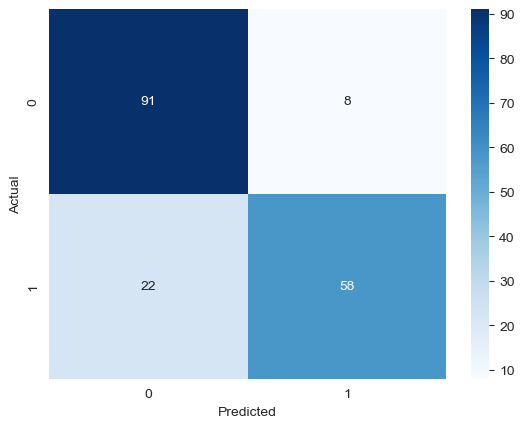

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Importance (Coefficients)

In [58]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
19,"FareBand_(31.0, 512.329]",0.402786
18,"FareBand_(14.454, 31.0]",0.299776
17,"FareBand_(7.91, 14.454]",0.153687
2,Fare,0.134095
7,Embarked_Q,-0.000753
13,AgeGroup_Teen,-0.048698
14,AgeGroup_Adult,-0.134722
4,Parch,-0.155718
8,Embarked_S,-0.156725
15,AgeGroup_Middle,-0.159023


## Exporting Cleaned Data

In [59]:
final_df = train[[
    'Survived',
    'Sex',
    'Age',
    'AgeGroup',
    'Title',
    'Pclass',
    'Fare',
    'FareBand',
    'SibSp',
    'Parch',
    'FamilySize',
    'Embarked'
]]

### For Model

In [60]:
model_df.to_csv("titanic_model_data.csv", index=False)

### For Dashboard

In [61]:
final_df.to_csv("titanic_dashboard_data.csv", index=False)

### Note

The Logistic Regression model is used as a baseline learning model.
More advanced classification techniques can be explored in future work.